In [0]:
!pip install pykalman
from pykalman import KalmanFilter 

     |████████████████████████████████| 235kB 3.3MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-cp36-none-any.whl size=48464 sha256=34f2d1e49285fb1c41161e9e5f65f036be3778777f0e8950fb9b46382bc16e43
  Stored in directory: /root/.cache/pip/wheels/d9/e8/6a/553d9832679cb74a8434fa597c3abdb07313e40054a0adf9ac
Successfully built pykalman


In [0]:
import numpy as np 
import pylab as pl

In [0]:
kf  = KalmanFilter(transition_matrices  =  [[1,1],[0,1]], observation_matrices= [[1.4,0.5],[0.0,1.2]])
measurements = np.asarray([[1,0],[0,0],[0,1]])
kf  = kf.em(measurements, n_iter = 5)

In [0]:
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)

In [0]:
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

In [0]:
kf.smooth(measurements)

(array([[ 0.5528586 , -0.08333897],
        [ 0.08607171,  0.11565358],
        [-0.21820744,  0.68193947]]), array([[[ 0.02539987, -0.0096823 ],
         [-0.0096823 ,  0.01372373]],
 
        [[ 0.05895566, -0.02424235],
         [-0.02424235,  0.03522233]],
 
        [[ 0.06729157, -0.02086786],
         [-0.02086786,  0.05210791]]]))

In [0]:
kf.filter

<bound method KalmanFilter.filter of <pykalman.standard.KalmanFilter object at 0x7f8a4f0f17f0>>

fitted model: <pykalman.standard.KalmanFilter object at 0x7f8a689337b8>


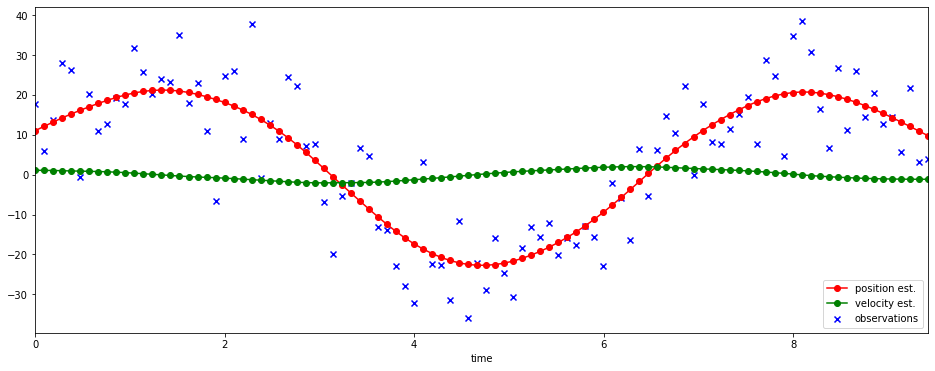

In [0]:
import numpy as np
import pylab as pl

from pykalman import KalmanFilter

rnd = np.random.RandomState(0)

# generate a noisy sine wave to act as our fake observations
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
#x
observations = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))
#observations
# create a Kalman Filter by hinting at the size of the state and observation
# space.  If you already have good guesses for the initial parameters, put them
# in here.  The Kalman Filter will try to learn the values of all variables.
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

# You can use the Kalman Filter immediately without fitting, but its estimates
# may not be as good as if you fit first.
states_pred = kf.em(observations).smooth(observations)[0]
print('fitted model: {0}'.format(kf))

# Plot lines for the observations without noise, the estimated position of the
# target before fitting, and the estimated position after fitting.
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, observations, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()

In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
#df = pd.read_csv(r'/home/giorgos/Downloads')

In [0]:
df = pd.read_csv('loutsa305.csv')
df.head(50)

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Latitude,Longitude,Speed (m/s),Unnamed: 13
0,21:27:55:099,0.3634,0.1956,0.8582,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.00000,0.000000,NaN
1,21:27:55:100,0.2661,0.1374,0.9398,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999,NaN
2,21:27:55:100,0.0728,0.1653,0.9780,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999,NaN
3,21:27:55:119,0.1085,0.2296,1.0201,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999,NaN
4,21:27:55:132,0.2680,0.2218,0.9952,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999,NaN
5,21:27:55:146,0.2008,0.2071,0.9121,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999,NaN
6,21:27:55:148,0.2008,0.2071,0.9121,0.0000,0.0000,0.0000,0.1055,0.0441,-0.0395,37.958354,23.97184,17.549999,NaN
7,21:27:55:168,0.0717,0.1972,0.8523,0.0000,0.0000,0.0000,0.1055,0.0441,-0.0395,37.958354,23.97184,17.549999,NaN
8,21:27:55:170,0.0717,0.1972,0.8523,0.0000,0.0000,-0.0000,0.1055,0.0441,-0.0395,37.958354,23.97184,17.549999,NaN
9,21:27:55:185,0.0620,0.1911,0.8939,0.0000,0.0000,-0.0000,0.1055,0.0441,-0.0395,37.958354,23.97184,17.549999,NaN


In [0]:
df = df.drop(columns = 'Unnamed: 13')
df.columns

Index(['time', 'gFx', 'gFy', 'gFz', 'ax', 'ay', 'az', 'wx', 'wy', 'wz',
       'Latitude', 'Longitude', 'Speed (m/s)'],
      dtype='object')

In [0]:
df

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,
21:27:55:100,0.2661,0.1374,0.9398,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999
21:27:55:100,0.0728,0.1653,0.9780,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999
21:27:55:119,0.1085,0.2296,1.0201,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999
21:27:55:132,0.2680,0.2218,0.9952,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999
21:27:55:146,0.2008,0.2071,0.9121,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.958354,23.97184,17.549999
...,...,...,...,...,...,...,...,...,...,...,...,...
21:45:20:900,0.0325,0.0669,1.0936,-0.0030,-0.0404,0.2377,-0.0435,0.0107,-0.0165,38.009589,23.85076,13.280000
21:45:20:902,0.0325,0.0669,1.0936,0.2064,-0.1888,0.9779,-0.0435,0.0107,-0.0165,38.009589,23.85076,13.280000
21:45:20:920,0.0103,0.1123,0.8864,0.2064,-0.1888,0.9779,-0.0435,0.0107,-0.0165,38.009589,23.85076,13.280000


In [0]:

df = df.set_index('time')
#df['time'].resample('1s').max()

In [0]:
 df.index.to_frame

In [0]:
df.index = pd.to_datetime(df.index)

In [0]:
#import datetime as datetime
#dateparse = lambda x: pd.datetime.strptime(x, '%H:%M:%S') 
#df['time'].resample('1s').max()


df = df.drop([21:27:55:099])


SyntaxError: ignored

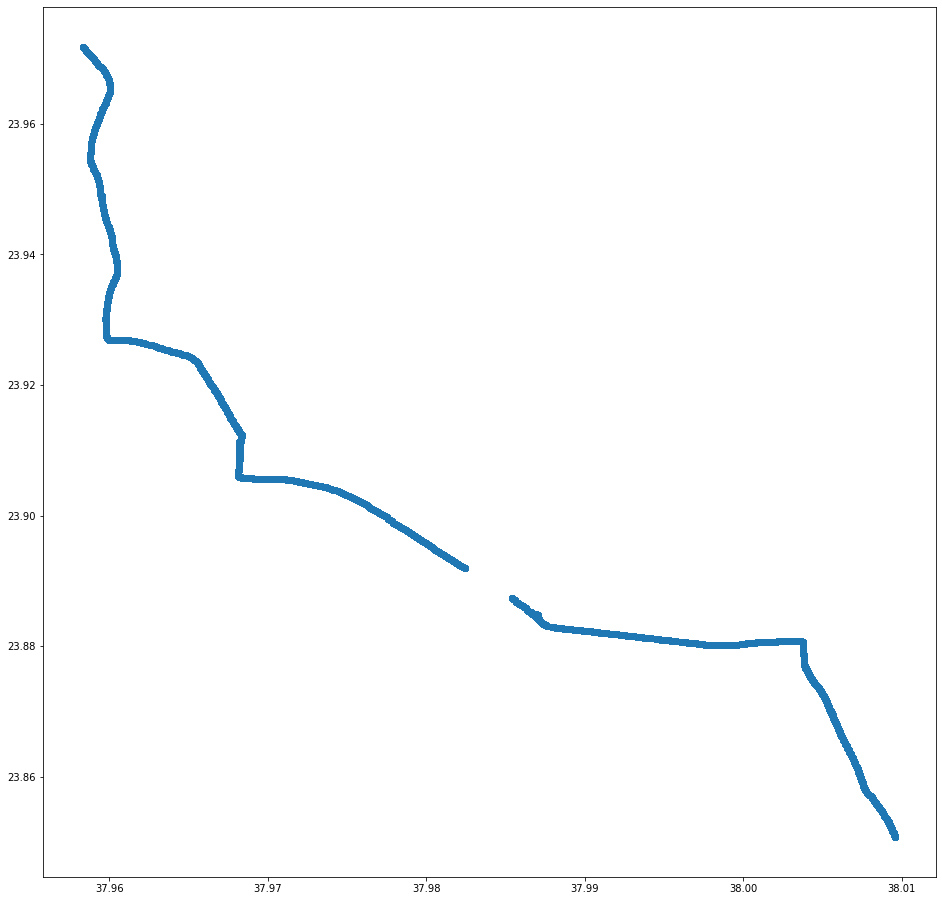

In [0]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(16, 16))
# plt.scatter(df['time'],df['Longitude'])
# plt.scatter(df['time'],df['Latitude'])
plt.scatter(df['Latitude'],df['Longitude'])

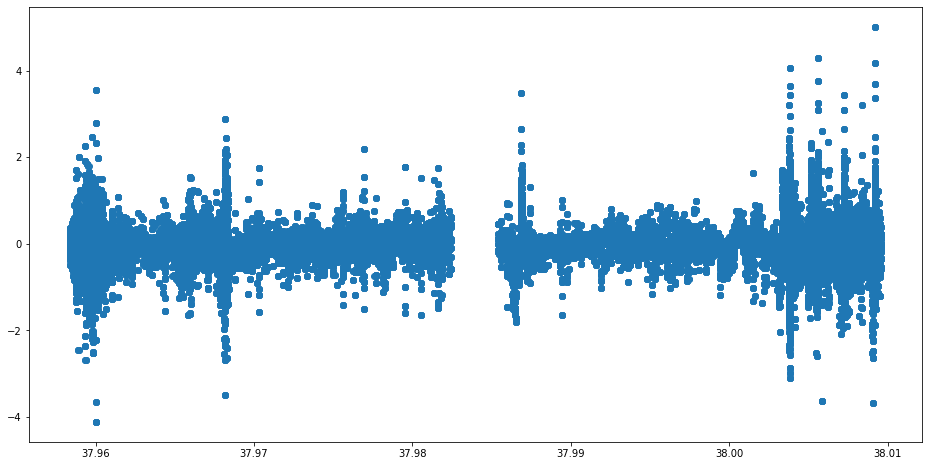

In [0]:
f, ax = plt.subplots(figsize =(16, 8))
#plt.scatter(df['Latitude'],df['Speed (m/s)'])
#plt.scatter(df['Latitude']['21:36:29:009':'21:36:57:283' ],df['ay']['21:36:29:009':'21:36:57:283' ])
#plt.scatter(df['Longitude']['21:36:29:009':'21:36:57:283' ],df['ay']['21:36:29:009':'21:36:57:283' ])
plt.scatter(df['Latitude'],df['ay'])

In [0]:
df['21:36:29:009':'21:36:57:283' ] # the gap spotted

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,
21:36:29:009,0.0415,0.0192,1.0201,-0.2658,0.6172,-2.2010,0.2397,-0.1081,0.0208,37.982411,23.892064,17.709999
21:36:29:023,0.0782,-0.1029,1.5479,-0.2658,0.6172,-2.2010,0.2397,-0.1081,0.0208,37.982411,23.892064,17.709999
21:36:29:042,-0.0451,0.1132,1.0975,-0.2658,0.6172,-2.2010,0.2397,-0.1081,0.0208,37.982411,23.892064,17.709999
21:36:29:045,-0.0451,0.1132,1.0975,-0.2658,0.6172,-2.2010,-0.0754,0.1577,-0.0007,37.982411,23.892064,17.709999
21:36:29:062,-0.0039,0.2079,0.8134,-0.2658,0.6172,-2.2010,-0.0754,0.1577,-0.0007,37.982411,23.892064,17.709999
21:36:29:064,-0.0039,0.2079,0.8134,-0.0780,0.0985,1.6854,-0.0754,0.1577,-0.0007,37.982411,23.892064,17.709999
21:36:29:082,0.0426,0.1023,0.9137,-0.0780,0.0985,1.6854,-0.0754,0.1577,-0.0007,37.982411,23.892064,17.709999
21:36:29:102,0.0265,0.0279,1.1118,-0.0780,0.0985,1.6854,-0.0754,0.1577,-0.0007,37.982411,23.892064,17.709999
21:36:29:104,0.0265,0.0279,1.1118,-0.0780,0.0985,1.6854,-0.0424,0.0615,0.0221,37.982411,23.892064,17.709999


In [0]:
df['ay'].max()

5.0129

In [0]:
#pred = kf.em(df['Latitude']).smooth(df['Latitude'])[0]
plt.plot(df['Latitude'])

In [0]:
#gap

#kinematics
# x= vo * t + 0.5 * a*t^2
# v= vo + a*t

#give the timestamp you want to make the prediction at. (in other words : where the gap begins) 
stamp = '21:36:29:200'
# give time space after gps loss in that you want to make the prediction (seconds)
t = 10 

pred_x = df['Speed (m/s)'][stamp] * t + 0.5 * df['ay'][stamp]* t*t #meters (distance)
pred_v = df['Speed (m/s)'][stamp] + df['ay'][stamp]* t #m/s (velocity)
print ("estimated distance travelled",pred_x, "meters","and speed", pred_v, "m/s")

estimated distance travelled 200.0799908 meters and speed 22.30599908 m/s


In [0]:
#alerts
#speed anomaly detection
j=0
for i in range (0 , len(df['ay'])):
  if df["Speed (m/s)"][i] > 23:
    print ("GPS coordinates",df["Latitude"][i],df["Longitude"][i], 'high speed alert', df["Speed (m/s)"][i])




GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high speed alert 23.20999908
GPS coordinates 37.95983502 23.9637885 high spee

In [0]:
#ax anomaly detection
for i in range (0 , len(df['ax'])):
   if df['ax'][i] > 3.0 :
    print ("GPS coordinates",df["Latitude"][i],df["Longitude"][i],'ax anomaly',df['ax'][i])

In [0]:
#Gyroscope anomaly detection
for i in range (0 , len(df['wx'])):
   if df['wx'][i] > 1.0 :
    print ("GPS coordinates",df["Latitude"][i],df["Longitude"][i],'wx anomaly',df['wx'][i])

In [0]:
#Non moving bus
for i in range (0 , len(df['Speed (m/s)'])):
   if df['Speed (m/s)'][i] == -0 :
    print ("GPS coordinates",df["Latitude"][i],df["Longitude"][i],'Non moving bus',df['Speed (m/s)'][i])

Streaming output truncated to the last 5000 lines.
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS coordinates 37.96818049 23.91037227 Non moving bus 0.0
GPS c